In [61]:
from importlib import reload
import sparse_corr as sp; reload(sp)

import numpy as np


In [62]:
from matplotlib import pyplot as plt
n = 10000000
arr = np.random.binomial( p = 0.1, n = 1, size = n)
indexes, = np.where(arr !=0)
values = arr[indexes]
def corr_emp(a, taus):
    corr = []
    fliptrace = a
    for k in taus:
        c = np.mean(fliptrace[k:]*fliptrace[:-k])
        corr.append(c)
    return corr

import time

In [87]:
ns = np.logspace(3,9,6)
ts = []
for n in ns:
    arr = np.random.binomial( p = 0.1, n = 1, size = int(n))
    #indexes, = np.where(arr !=0)
    #values = arr[indexes]
    t = time.time()
    taus = range(2,3)
    c_e = corr_emp(arr,taus)
    t1 = time.time()
    print(t1-t)
    ts.append(t1-t)

0.00015616416931152344
0.00039196014404296875
0.001672983169555664
0.025471925735473633
0.3615391254425049
27.265588998794556


Text(0, 0.5, 'Time per tau, s')

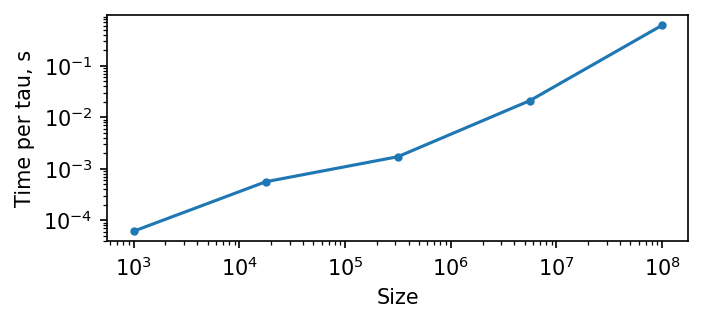

In [79]:
plt.figure(dpi = 150, figsize = (5,2))
plt.loglog(ns,np.array(ts)/8.0,'.-')
plt.xlabel('Size')
plt.ylabel('Time per tau, s')

In [84]:
ns = np.logspace(3,9,6)
ts_s_05 = []
for n in ns:
    arr = np.random.binomial( p = 0.05, n = 1, size = int(n))
    indexes, = np.where(arr !=0)
    values = arr[indexes]
    t = time.time()
    taus = range(2,3)
    #c_e = corr_emp(arr,taus)
    c_sparse = sp.correlate_sparse_vector(indices = indexes, values = values, taus = taus,n=n, time_print = False)
    t1 = time.time()
    print(t1-t)
    ts_s_05.append(t1-t)

0.002248048782348633
0.0016720294952392578
0.02100825309753418
0.1346449851989746
2.1054327487945557
119.56298995018005


Text(0, 0.5, 'Time per tau, s')

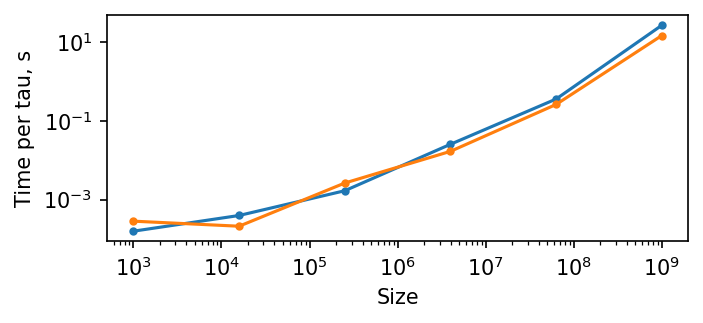

In [88]:
plt.figure(dpi = 150, figsize = (5,2))
plt.loglog(ns,np.array(ts),'.-')
#plt.loglog(ns,np.array(ts_s)/8.0,'.-')
plt.loglog(ns,np.array(ts_s_05)/8.0,'.-')
plt.xlabel('Size')
plt.ylabel('Time per tau, s')

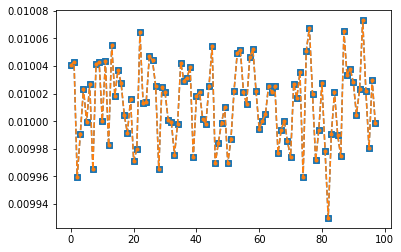

In [66]:
plt.plot(c_e,'s--')
plt.plot(c_sparse,'.--')